In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
df = pd.read_csv("results/timings.csv")
df["Image size"] = df["size"].astype(str) + "x" + df["size"].astype(str)

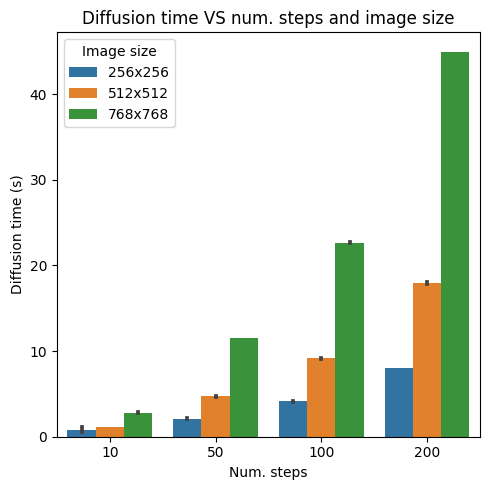

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=df, x="steps", y="total_time", hue="Image size", ax=ax)
ax.set_title("Diffusion time VS num. steps and image size")
ax.set_xlabel("Num. steps")
ax.set_ylabel("Diffusion time (s)")
fig.tight_layout()
fig.savefig("results/diffusion_time_vs_steps_and_size.png", dpi=300)

In [30]:
# run nvidia-smi to get GPU memory usage
import subprocess
import pandas as pd

def get_gpu_memory_usage():
    result = subprocess.check_output(
        [
            'nvidia-smi', '--query-gpu=memory.used',
            '--format=csv,nounits,noheader'
        ], encoding='utf-8')
    # Convert lines into a dictionary
    gpu_memory = [int(x) for x in result.strip().split('\n')]
    return gpu_memory

def get_gpu_memory_usage_df():
    gpu_memory = get_gpu_memory_usage()
    df = pd.DataFrame(gpu_memory, columns=["memory"])
    return df

df = get_gpu_memory_usage_df()
df.to_csv("results/gpu_memory_usage.csv", index=False)